
# **Final Project - Phase 1**

CS470 - CS670
**Professor:** Dr. Wei Ding

**TAs:**



*   Haowen Guan Haowen.guan001@umb.edu
*   Mahsa Geshvadi Mahsa.geshvadi001@umb.edu




**Team 8**


*   Nicole Strounine: nicole.strounine001@umb.edu
*   Naomi Adebo-Young: naomi.adeboyoung001@umb.edu
*   Emilia Morgan: emilia.morgan001@umb.edu
*   Billy Bakalis: william.bakalis001@umb.edu
*   Viviana Romero Alarcon: viviana.romeroalarcon@umb.edu
*   Raymond Dugas: raymond.dugas001@umb.edu
*   William Ding: william.ding001@umb.edu
*   Svetozar Draganitchki: s.draganitchki001@umb.edu




# **Project Abstract:**


“This study explores the application of machine learning techniques to classify the phenotypes of different types of budgerigars based on there unique characteristic traits. The fastup library will be used to clean up the data set by filtering duplicates, invalid/broken files, outliers, and problematic images that could lead to misleading classifications. Subsequently, the cleaned images will be stored into an hdf5 file to allow for efficient data retrieval and processing when working with the datasets.  The H5py library will be used to show each datasets name, shape and to visualize the images from the hdf5 file. The datasets will then be converted into NumPy array to facilitate the splitting of data into training and validation subsets, which will be used to train and evaluate the AI model. To train the model, we will generate batches of augmented images using x_train and y_train, which will help train the model to generalize handling different variations of input data. In the final stage of data preparation, this study will load the pre-processed datasets into PyTorch tensors and utilize the PyTorch library’s utilities to feed the data to the model. In conclusion, this study shows the importance of applying machine learning techniques to classify budgerigars’ phenotypes, demonstrating the importance of thorough data preparation, efficient data handling, and deep learning frameworks, allowing for future researchers’ techniques to problem solving AI issues.”

**General Goal:**


The goal of this final project is to ensure that students gain hands-on experience in building models. We aim for students to understand and engage in the entire pipeline of training a model in a simplified manner.


# **Understanding the Dataset:**

**Study subject:**

The budgerigars (*Melopsittacus undulatus*) are a specie of the parrot family that have been extensively bred because of the plumage traits. It is a domestic species currently,but also considered as a exotic and invasor species outside Oceania. The domestication and inbreading have produced several colorful phenotypes in this species, including a an albin phenotype because of the entire loss of the psittacofulvin pigments. The genetic base behind those phenotype is described by a mendelian heritage, which generate mainly four diffrent patters, such as wild-type, recesive blue-type, yellow-type and Albin[1]

For this excersice, we will use those phenotype to perform a supervise clasification that will detect the phenotype type, depending on the pigments expresed on the feather. Thus, the used classes will correspond to the most common phenotypes. Thus:


- **Wild Budgies:**
This category comprises images depicting budgerigars with the characteristic green plumage, yellow face and abdomen, black wing markings, and blue cheek patches, representing the natural coloration of wild budgerigars.

- **Blue Budgies:**
In this category, you will find images showcasing budgerigars with a blue color mutation, where the typical green plumage is replaced by varying shades of blue, often retaining the signature black wing markings and blue cheek patches.

- **Yellow Budgies:**
This category features budgerigars with vibrant yellow plumage, resulting from specific genetic mutations inhibiting melanin production. These birds exhibit a range of shades from pale yellow to deep golden, adding a bright and cheerful presence to the dataset.

- **White Budgies:**
The white budgie category includes images of budgerigars with pure white plumage, a result of genetic mutations suppressing pigment production. These birds may have dark or pink eyes, contributing to their unique appearance within the dataset.

- **Others:**
In this category there are two or more budgies of different colorations in a single image

[1] Cooke, Thomas F., et al. "Genetic mapping and biochemical basis of yellow feather pigmentation in budgerigars." Cell 171.2 (2017): 427-439.



# **Specific goal in the phase 1:**

1. Data Cleaning: Removing or correcting missing, noisy, or irrelevant data.

2. Normalization: Scaling numerical data to a standard range, enhancing model
training stability and convergence speed.

3. Data Augmentation: Artificially increasing the size and variability of the dataset through techniques such as flipping, rotation, or color adjustment to improve model robustness.

4. Data Splitting: Dividing the dataset into training, validation, and testing sets to evaluate model performance effectively.

5. Image Resizing and Resampling: Adjusting image dimensions and resolution
to meet the input requirements of the model.

6. Visualization: Inspecting the dataset visually to understand its characteristics and to identify any apparent patterns or anomalies.

7. Dataloader: Load pre-processed dataset into a “torch.utils.data.DataLoader”
that is ready to use like HW.





 # **Libraries and modules**

In [ ]:
# Load libraries for cleaning and analysis

# basic calculation
import pandas as pd
import numpy as np
import cv2
import os
import h5py
import ast

# Load data and cleaning
!pip install fastdup -Uq # cleaning pipeline
!pip install gdown # download folder from Google drive
import gdown
import fastdup # a tool that analyzes, cleans, and manages image datasets


# Processing and Analysis
import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from torchvision import transforms
from PIL import Image
from tensorflow import keras
from keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Visualization
import matplotlib.mlab as mlab
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.2/75.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.


# **Data Preprocessing Strategies**

In [ ]:
# commented out for now, since we need to upload a picture or run the colab first
# to generate the files
#import matplotlib.image as mpimg
#img = mpimg.imread('/content/Dataset/Picture2.png')
#plt.imshow(img)
#plt.axis('off')
#plt.show()



#plt.rcParams['figure.figsize'] = [30, 20]

# **Objective 1: Data Cleaning**

**Strategy:**

fd.ru() allows us to perform a complete analysis in which we can get those potential anomalous images that could increase the noise during training. However, curatoring should be performed in a systematic way. For example,  we could see images in which some pictures are duplicated and blurred. If we delete the first duplicates, the algorithm will keep the first in the list, which could be the blurred. So considering those problem, we decided our curatoring pipeline as:



*   Delete corrupt files
*   Delete anomalies: Methods= Dark, Bright, Blurry
*   Delete outlier
*   Delete Duplicates.






### 1) Load and unzip dataset
We will start cleaning the database using the fast library. This library offers an easy-friendly pipeline to filter duplicates, invalid/broken files, outliers, and problematic images that could lead to a misleading classification, such as too dark, too bright, or too blurry.

In [ ]:
###### Data Structure / loading folder


# Dataset tree:
# /Dataset
#   |---Images
#       |---Blue_budgies
#       |---Others
#       |---White_budgies
#       |---Wild_budgies
#       |---Yellow_budgies
#   |---Meta
#   |---Report



# location - Viviana's Drive
#https://drive.google.com/file/d/1LygsKSRuSfI9JdINI7YRKDGoLOsTqGER/view?usp=sharing
#https://drive.google.com/file/d/1X-JkfF9pXOZqd1drHRK_T7Q6z-a0y9x5/view?usp=sharing#
#https://drive.google.com/file/d/167AQHe9OqMisJmLFuLMjb3fF7iJpGZR3/view?usp=sharing# + images from inaturalist - images < 9 Kb



# upload to Colab
url = "https://drive.google.com/file/d/167AQHe9OqMisJmLFuLMjb3fF7iJpGZR3/view?usp=sharing"
gdown.download(url=url, output="Dataset.zip", fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=167AQHe9OqMisJmLFuLMjb3fF7iJpGZR3
From (redirected): https://drive.google.com/uc?id=167AQHe9OqMisJmLFuLMjb3fF7iJpGZR3&confirm=t&uuid=c97ce06e-0acd-4958-a68e-ffbe30776d42
To: /content/Dataset.zip
100%|██████████| 45.4M/45.4M [00:00<00:00, 50.7MB/s]


'Dataset.zip'

#### ZIP Dataset
The source of the dataset will be extracted from Dataset.zip file. The zip file contains an assortment of different files from a README.txt, metadata in the form of text files, and images of budgerigars. The images in the zip file are of jpg and jpeg file type.

In [ ]:
# unzip file
!unzip -o ./Dataset.zip

Archive:  ./Dataset.zip
   creating: Dataset3/
  inflating: __MACOSX/._Dataset3     
  inflating: Dataset3/.DS_Store      
  inflating: __MACOSX/Dataset3/._.DS_Store  
   creating: Dataset3/Images/
   creating: Dataset3/Meta/
  inflating: Dataset3/README.txt     
  inflating: __MACOSX/Dataset3/._README.txt  
  inflating: Dataset3/Picture2.png   
  inflating: __MACOSX/Dataset3/._Picture2.png  
   creating: Dataset3/Images/Blue_budgies/
  inflating: __MACOSX/Dataset3/Images/._Blue_budgies  
  inflating: Dataset3/Images/.DS_Store  
  inflating: __MACOSX/Dataset3/Images/._.DS_Store  
   creating: Dataset3/Images/Wild_budgies/
  inflating: __MACOSX/Dataset3/Images/._Wild_budgies  
   creating: Dataset3/Images/Others/
  inflating: __MACOSX/Dataset3/Images/._Others  
   creating: Dataset3/Images/Yellow_budgies/
  inflating: __MACOSX/Dataset3/Images/._Yellow_budgies  
   creating: Dataset3/Images/White_budgies/
  inflating: __MACOSX/Dataset3/Images/._White_budgies  
  inflating: Dataset3/Meta/

### 2) Creating a fastdup object that contains all the images for analysis

In [ ]:
# work_dir= directory to save the work, input_dir= image source
fd = fastdup.create(work_dir= "/content/Dataset3/Report",
                    input_dir="/content/Dataset3/Images")


### 3) Setting up the values for clustering



In [ ]:
# arguments in run
#help(fd.run)

# similarity measure threshold ( it is a unsupervised classification)
#threshold: Threshold to use for the graph generation. Default is 0.9.
#cc_threshold: Threshold to use for the graph connected component. Default is 0.96.
# Similarity percentile measure to outline images that are far away (outliers) (it is outside of the last quantil)

fd.run(input_dir= "/content/Dataset3/Images",
       verbose= True,
       cc_threshold=0.9,
       lower_threshold = 0.05,
       overwrite=True)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
fastdup C++ info received:  2024-05-06 19:30:48 [INFO] Going to loop over dir Dataset3/Images
2024-05-06 19:30:48 [INFO] Found total 309 images to run on, 309 train, 0 test, name list 309, counter 309 
2024-05-06 19:30:58 [INFO] Found total 309 images to run on
2024-05-06 19:30:58 [INFO] 24) Finished write_index() NN model
2024-05-06 19:30:58 [INFO] Stored nn model index file Dataset3/Report/nnf.index
2024-05-06 19:30:58 [INFO] Total time took 10044 ms
2024-05-06 19:30:58 [INFO] Found a total of 20 fully identical images (d>0.990), which are 3.24 % of total graph edges
2024-05-06 19:30:58 [INFO] Found a total of 16 nearly identical images(d>0.980), which are 2.59 % of total graph edges
2024-05-06 19:30:58 [INFO] Found a total of 84 above threshold images (d>0.900), which are 13.59 % of total graph edges
2024-05-06 19:30:58 [INFO] Found a total of 31 outlier images         (d<0.050), which are 5.02 % of total gra

0

In [ ]:
# Summary the dataset and the values to run the anlysis
fd.summary()


 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 309 images
    Valid images are 100.00% (309) of the data, invalid are 0.00% (0) of the data
    Components:  failed to find images clustered into components, try to run with lower cc_threshold.
    Outliers: 7.12% (22) of images are possible outliers, and fall in the bottom 5.00% of similarity values.
    For a detailed list of outliers, use `.outliers()`.



['Dataset contains 309 images',
 'Valid images are 100.00% (309) of the data, invalid are 0.00% (0) of the data',
 'Components:  failed to find images clustered into components, try to run with lower cc_threshold.',
 'Outliers: 7.12% (22) of images are possible outliers, and fall in the bottom 5.00% of similarity values.',
 'For a detailed list of outliers, use `.outliers()`.\n']

### 4) Detecting invalidate files or broken links



In [ ]:
# invalid arguments
#help(fd.invalid_instances)


# Apply invalid_instance to a fastdup object/ Looking for corrupt files
#Valid images are 100.00% (339) of the data, invalid are 0.00% (0) of the data
broken = fd.invalid_instances()
broken

,filename,index,error_code,is_valid,fd_index


In [ ]:
# data for final inform
list_of_broken_images = broken['filename'].to_list()
list_of_broken_images

[]

### 5) Anomalies: Dark, Bright and blurry

In this case, we use the central tendency measures to calculate to determine underexposed and overexposed images.
Likewise, I will use laplacian variance to determine the edges. Low values indicates blurried images.

mean (color), max (color), min (color), stdv (color), unique (number of unique colors), bluriness (computed by the variance of the laplpacian method)

Generating gallery:   0%|          | 0/2 [00:00<?, ?it/s]

Stored mean visual view in  Dataset3/Report/galleries/mean.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



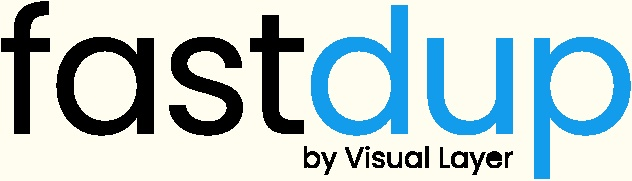
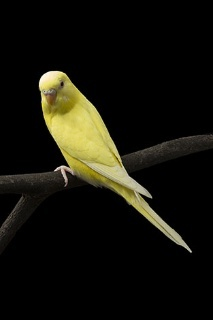
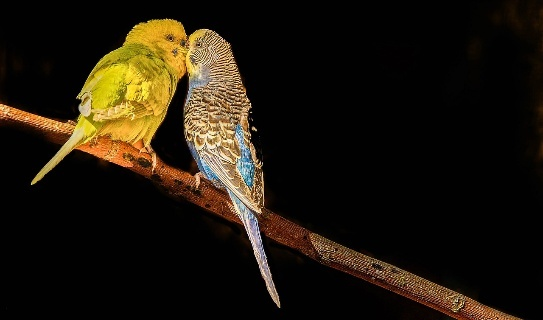

0

In [ ]:
#visualize images with low explosure
fd.vis.stats_gallery(metric='dark', num_images= 2, how = 'all')

In [ ]:
# getting statistic metrics
stats_df = fd.img_stats()

# Initial pictures
initial_pictures = len(stats_df['index'])

stats_df.head(n= 20)


,index,img_w,img_h,unique,blur,mean,min,max,stdv,file_size,contrast,filename,error_code,is_valid,fd_index
0,0,238,180,256,3790.0437,140.1434,0.0,255.0,54.8252,11016,1.0,Dataset3/Images/Blue_budgies/Blue_budgie (10).jpeg,VALID,True,0
1,1,958,1277,256,866.9830,87.3646,0.0,255.0,52.8023,143964,1.0,Dataset3/Images/Blue_budgies/Blue_budgie (10).jpg,VALID,True,1
2,2,238,180,256,3790.0437,140.1434,0.0,255.0,54.8252,11016,1.0,Dataset3/Images/Blue_budgies/Blue_budgie (11).jpeg,VALID,True,2
3,3,594,720,251,480.1164,139.7268,0.0,255.0,52.7159,37167,1.0,Dataset3/Images/Blue_budgies/Blue_budgie (12).jpg,VALID,True,3
4,4,853,1280,232,1218.1327,115.2283,0.0,231.0,44.9840,93005,1.0,Dataset3/Images/Blue_budgies/Blue_budgie (13).jpg,VALID,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,15,1425,950,256,4485.1694,166.3734,0.0,255.0,79.8484,59644,1.0,Dataset3/Images/Blue_budgies/Blue_budgie (20).jpg,VALID,True,15
16,16,683,1024,256,2148.5579,100.7650,0.0,255.0,50.5595,156231,1.0,Dataset3/Images/Blue_budgies/Blue_budgie (21).jpg,VALID,True,16
17,17,3864,5152,256,1101.3937,138.8836,0.0,255.0,58.7991,1845742,1.0,Dataset3/Images/Blue_budgies/Blue_budgie (22).jpg,VALID,True,17
18,18,1280,853,255,1600.7886,83.3479,0.0,255.0,50.6261,154153,1.0,Dataset3/Images/Blue_budgies/Blue_budgie (24).jpg,VALID,True,18


### Standard cut-off values

<ipython-input-13-ebcf204ee929>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  means = sns.distplot(stats_df['mean'])


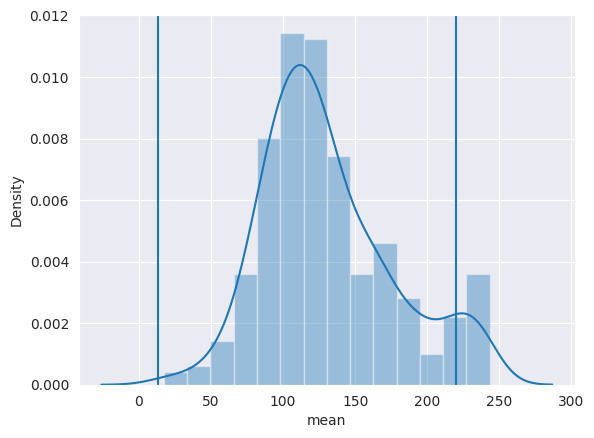

In [ ]:
# Distribution of the RGB mean to determine darkness and brightness

import seaborn as sns
from scipy import stats

sns.set_style('darkgrid')
means = sns.distplot(stats_df['mean'])
means.axvline(x = 13,   #standard value to define underexposed images
           ymin = 0,
           ymax = 1)
means.axvline(x = 220,  #standard value to define overexposed images
           ymin = 0,
           ymax = 1)


plt.rcParams['figure.figsize'] = [10, 5]



<ipython-input-14-81b27e5a33c0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  blur = sns.distplot(stats_df['blur'] , fit=stats.laplace, kde=False)


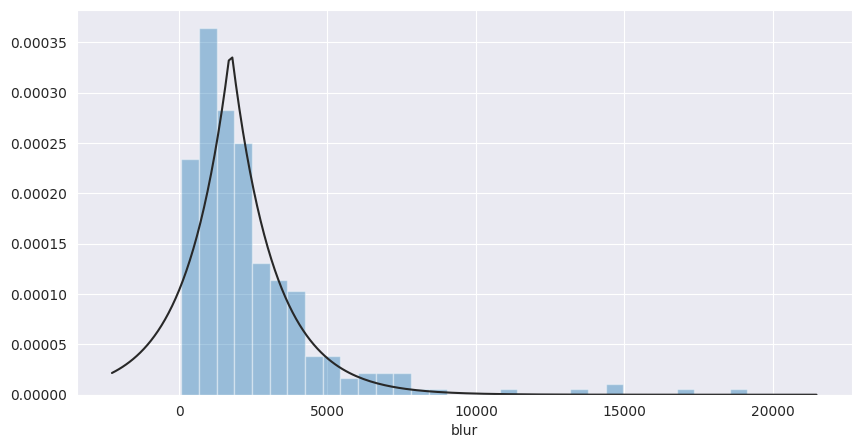

In [ ]:
# Laplacian variance for blurried images (lower values than 50 are )
sns.set_style('darkgrid')
blur = sns.distplot(stats_df['blur'] , fit=stats.laplace, kde=False)

plt.rcParams['figure.figsize'] = [10, 5]


### Cut-off values
It is usual that laplacian variance (Blurry) is ralated with the mean of color.

We decide to explore the tendency to determine the cut-off values for determine under and overexposed images

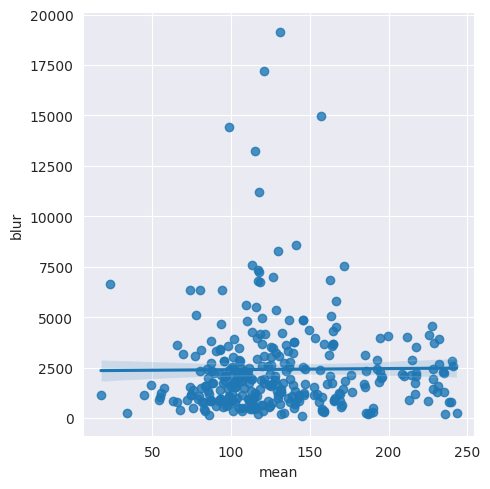

In [ ]:
ax = sns.lmplot(x="mean", y="blur", data=stats_df);

plt.rcParams['figure.figsize'] = [10, 5]


Considering there is not a relationship in our dataset between mean an blurrry, we decide to use the standard values.

### geting underexposed images

In [ ]:
# get the underexposed images
dark = stats_df[stats_df['mean'] < 13]
dark


,index,img_w,img_h,unique,blur,mean,min,max,stdv,file_size,contrast,filename,error_code,is_valid,fd_index


In [ ]:
# data for final inform
list_of_dark_images = dark['filename'].to_list()
list_of_dark_images

[]

### Delete underexposed images
There is any underexposed image

In [ ]:
# extract files names of dark pictures
#dark_files = dark['filename'].to_list()
#dark_files
top_components = fastdup.find_top_components(work_dir="/content/Dataset3/Report")
fastdup.delete_or_retag_stats_outliers("/content/Dataset3/Report", metric='mean', lower_threshold=13, dry_run=True)


Going to delete any images with mean < 13
Did not find any items to delete, please check your selection


0

### Getting overexposed images


Generating gallery:   0%|          | 0/2 [00:00<?, ?it/s]

Stored mean visual view in  Dataset3/Report/galleries/mean.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



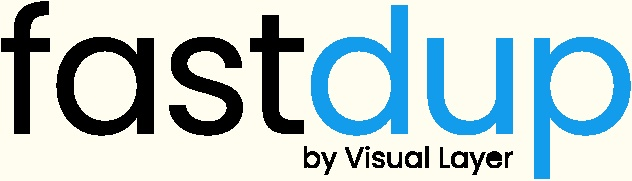
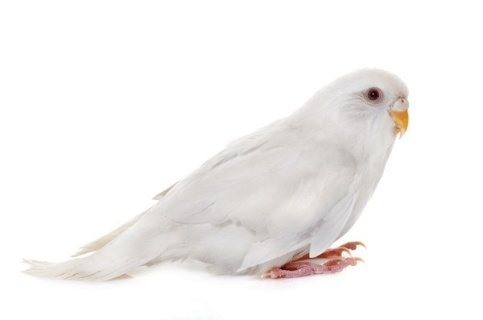
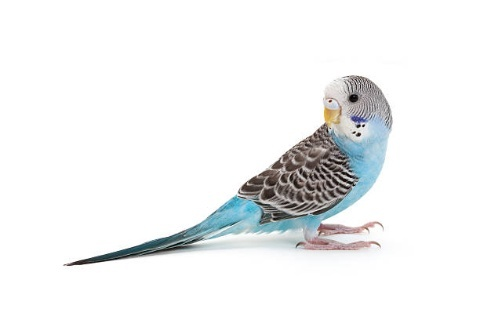

0

In [ ]:
fd.vis.stats_gallery(metric='bright', num_images= 2, how = 'all')

In [ ]:
# get the underexposed images
bright = stats_df[stats_df['mean'] > 245]
bright

,index,img_w,img_h,unique,blur,mean,min,max,stdv,file_size,contrast,filename,error_code,is_valid,fd_index


In [ ]:
# getting the list of files
bright_files = bright['filename'].to_list()
bright_files

[]

In [ ]:
# data for final inform
list_of_bright_images = bright['filename'].to_list()
list_of_bright_images

[]

### Delete overexposed images


In [ ]:
# Explore files
fastdup.delete_or_retag_stats_outliers("/content/Dataset3/Report", metric='mean', upper_threshold=245, dry_run=True)



Going to delete any images with mean > 245
Did not find any items to delete, please check your selection


0

In [ ]:
# Delete files
fastdup.delete_or_retag_stats_outliers("/content/Dataset3/Report", metric='mean', upper_threshold=245, dry_run=False)

Going to delete any images with mean > 245
Did not find any items to delete, please check your selection


0

### Getting blurried images

Generating gallery:   0%|          | 0/2 [00:00<?, ?it/s]

Stored blur visual view in  Dataset3/Report/galleries/blur.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



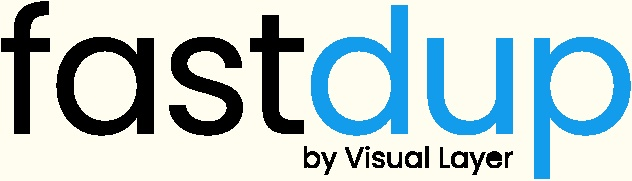
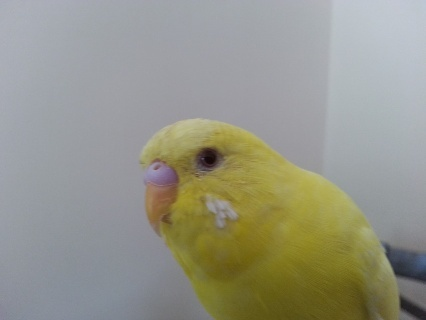
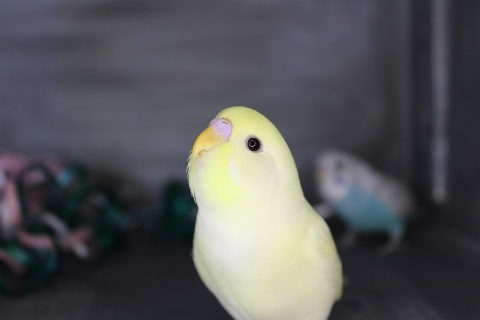

0

In [ ]:
#visualize images blurred
fd.vis.stats_gallery(metric='blur', num_images= 2, how = 'all')

<ipython-input-25-739aa9444625>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  blur = sns.distplot(stats_df['blur'] , fit=stats.laplace, kde=False)


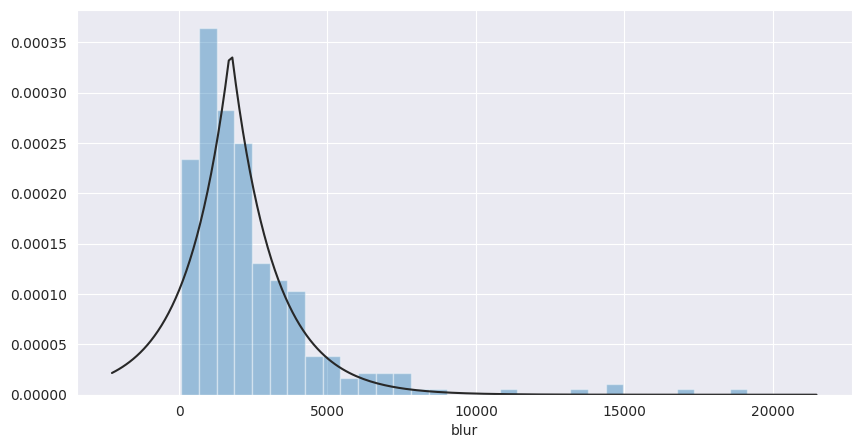

In [ ]:
# Laplacian variance for blurried images (lower values than 50 are )
sns.set_style('darkgrid')
blur = sns.distplot(stats_df['blur'] , fit=stats.laplace, kde=False)
plt.rcParams['figure.figsize'] = [10, 5]


In [ ]:
# get the underexposed images
blurry = stats_df[stats_df['blur'] < 200]
blurry


,index,img_w,img_h,unique,blur,mean,min,max,stdv,file_size,contrast,filename,error_code,is_valid,fd_index
263,263,480,853,231,181.3239,117.0949,0.0,230.0,48.2253,25750,1.0000,Dataset3/Images/Yellow_budgies/Yellow_budgie (11).jpg,VALID,True,263
274,274,1280,853,252,168.6344,86.1700,0.0,251.0,58.0966,102579,1.0000,Dataset3/Images/Yellow_budgies/Yellow_budgie (22).jpg,VALID,True,274
287,287,1280,960,210,72.8361,145.3272,7.0,216.0,34.0911,102471,0.9372,Dataset3/Images/Yellow_budgies/Yellow_budgie (42).jpg,VALID,True,287


In [ ]:
# getting the list of files
blurry_files = blurry['filename'].to_list()
blurry_files

['Dataset3/Images/Yellow_budgies/Yellow_budgie (11).jpg',
 'Dataset3/Images/Yellow_budgies/Yellow_budgie (22).jpg',
 'Dataset3/Images/Yellow_budgies/Yellow_budgie (42).jpg']

In [ ]:
# data for final inform
list_of_blurry_images = blurry['filename'].to_list()
list_of_blurry_images

['Dataset3/Images/Yellow_budgies/Yellow_budgie (11).jpg',
 'Dataset3/Images/Yellow_budgies/Yellow_budgie (22).jpg',
 'Dataset3/Images/Yellow_budgies/Yellow_budgie (42).jpg']

### Delete blurried images



In [ ]:
# Explore files
fastdup.delete_or_retag_stats_outliers("/content/Dataset3/Report", metric='blur', lower_threshold=200, dry_run=True)


Going to delete any images with blur < 200
rm -f Dataset3/Images/Yellow_budgies/Yellow_budgie (11).jpg
rm -f Dataset3/Images/Yellow_budgies/Yellow_budgie (22).jpg
rm -f Dataset3/Images/Yellow_budgies/Yellow_budgie (42).jpg


0

In [ ]:
# Delete files
fastdup.delete_or_retag_stats_outliers("/content/Dataset3/Report", metric='blur', lower_threshold=200, dry_run=False)


Going to delete any images with blur < 200
total deleted 3 files


0

## 6) Anomalies: Outliers

Fastdup uses k similar neighbors to determine clusters, so anything outside of a threshold is considered an outlier.

That means we could detect images that does not correspond to budgerigars. In this case we considere as outlier all pictures in the 5% outside the main distribution of similarity



Generating gallery:   0%|          | 0/2 [00:00<?, ?it/s]

Stored outliers visual view in  Dataset3/Report/galleries/outliers.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



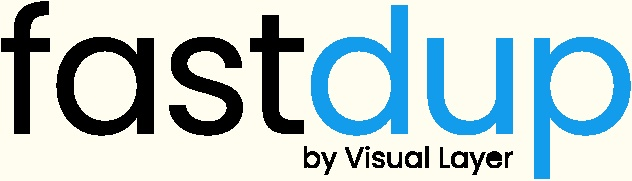
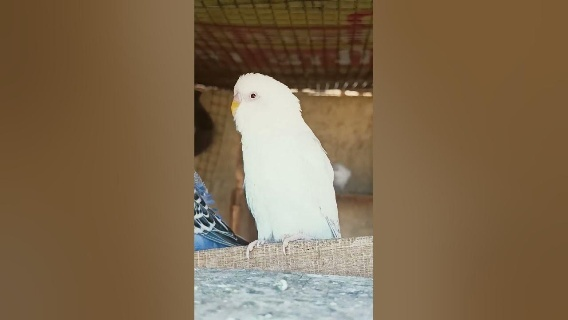
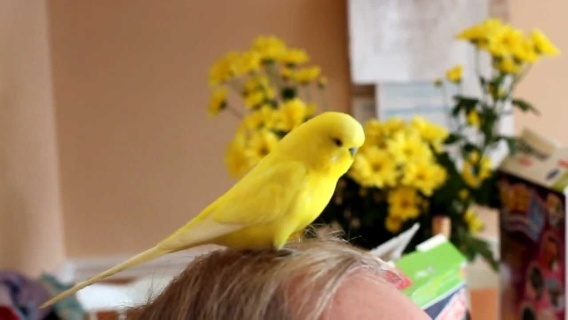

0

In [ ]:
# Visualize cluster distance
fd.vis.outliers_gallery(num_images = 2, how = 'all')


In [ ]:
outlier = fd.outliers()
outlier.head()

,outlier,nearest,distance,filename_outlier,index_x,error_code_outlier,is_valid_outlier,fd_index_outlier,filename_nearest,index_y,error_code_nearest,is_valid_nearest,fd_index_nearest
0,112,124,0.557202,Dataset3/Images/White_budgies/White_budgie (19).jpg,112,VALID,True,112,Dataset3/Images/White_budgies/White_budgie (32).jpeg,124,VALID,True,124
1,121,120,0.592589,Dataset3/Images/White_budgies/White_budgie (2).JPG,121,VALID,True,121,Dataset3/Images/White_budgies/White_budgie (2).jpeg,120,VALID,True,120
2,267,97,0.605120,Dataset3/Images/Yellow_budgies/Yellow_budgie (15).jpg,267,VALID,True,267,Dataset3/Images/Others/others (38).jpg,97,VALID,True,97
3,172,90,0.638011,Dataset3/Images/Wild_budgies/Wild_budgie (14).jpg,172,VALID,True,172,Dataset3/Images/Others/others (31).jpg,90,VALID,True,90
4,32,218,0.652599,Dataset3/Images/Blue_budgies/Blue_budgie (39).jpg,32,VALID,True,32,Dataset3/Images/Wild_budgies/Wild_budgie (57).jpg,218,VALID,True,218


<ipython-input-33-52f9b0bb5b0e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  means = sns.distplot(outlier['distance'])


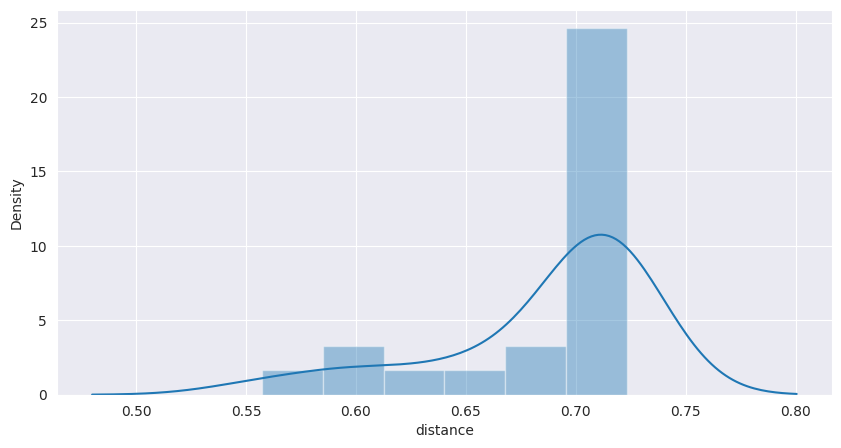

In [ ]:
#Vizualize diatances
sns.set_style('darkgrid')
means = sns.distplot(outlier['distance'])
plt.rcParams['figure.figsize'] = [10, 5]


Histogram shows us that evidently there are not outliers in our dataset, however there are some picture with extra objects (diffrent than birds) that could cause confusion in the training. So, we decide to delete them.

In [ ]:
# get outlier
outliers_files = outlier[outlier.distance < 0.6]
outliers_files



,outlier,nearest,distance,filename_outlier,index_x,error_code_outlier,is_valid_outlier,fd_index_outlier,filename_nearest,index_y,error_code_nearest,is_valid_nearest,fd_index_nearest
0,112,124,0.557202,Dataset3/Images/White_budgies/White_budgie (19).jpg,112,VALID,True,112,Dataset3/Images/White_budgies/White_budgie (32).jpeg,124,VALID,True,124
1,121,120,0.592589,Dataset3/Images/White_budgies/White_budgie (2).JPG,121,VALID,True,121,Dataset3/Images/White_budgies/White_budgie (2).jpeg,120,VALID,True,120


In [ ]:
#export outlier becuase the original file does not have filenames
outliers_files.to_csv('/content/Dataset3/Report/outliers2.csv')

In [ ]:
# data for final inform
list_of_outliers_images = outliers_files['filename_outlier'].to_list()
list_of_outliers_images

['Dataset3/Images/White_budgies/White_budgie (19).jpg',
 'Dataset3/Images/White_budgies/White_budgie (2).JPG']

### Delete files

In [ ]:
# Explore files
fastdup.delete_or_retag_stats_outliers(stats_file=outlier,
                                       metric='distance', filename_col='filename_outlier',
                                       lower_threshold=0.6, dry_run=True,
                                       work_dir= '/content/Dataset3/Report')

Going to delete any images with distance < 0.6
rm -f Dataset3/Images/White_budgies/White_budgie (19).jpg
rm -f Dataset3/Images/White_budgies/White_budgie (2).JPG


0

In [ ]:
# Delete files

fastdup.delete_or_retag_stats_outliers(stats_file=outlier,
                                       metric='distance', filename_col='filename_outlier',
                                       lower_threshold=0.6, dry_run=False,
                                       work_dir= '/content/Dataset3/Report')

Going to delete any images with distance < 0.6
total deleted 2 files


0

## 7) Duplicates

In this point, we have already delete some files. Hence, we need to rerun the analysis to recalculate distances, delete duplicatebut keeping the best pictue per cluster.

In [ ]:
fd.run(input_dir= "/content/Dataset3/Images",
       verbose= True,
       cc_threshold=0.9,
       lower_threshold = 0.05,
       overwrite=True)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
fastdup C++ info received:  2024-05-06 19:32:34 [INFO] Going to loop over dir Dataset3/Images
2024-05-06 19:32:34 [INFO] Found total 304 images to run on, 304 train, 0 test, name list 304, counter 304 
2024-05-06 19:32:44 [INFO] Found total 304 images to run on
2024-05-06 19:32:44 [INFO] 19) Finished write_index() NN model
2024-05-06 19:32:44 [INFO] Stored nn model index file Dataset3/Report/nnf.index
2024-05-06 19:32:44 [INFO] Total time took 10035 ms
2024-05-06 19:32:44 [INFO] Found a total of 20 fully identical images (d>0.990), which are 3.29 % of total graph edges
2024-05-06 19:32:44 [INFO] Found a total of 16 nearly identical images(d>0.980), which are 2.63 % of total graph edges
2024-05-06 19:32:44 [INFO] Found a total of 84 above threshold images (d>0.900), which are 13.82 % of total graph edges
2024-05-06 19:32:44 [INFO] Found a total of 30 outlier images         (d<0.050), which are 4.93 % of total gra

0

### Test clusters

We are lloking for not only exact duplicates but also near pictures. E.g pictures from the same animal in diffrente poses

Generating gallery:   0%|          | 0/2 [00:00<?, ?it/s]

Finished OK. Components are stored as image files Dataset3/Report/galleries/components_[index].jpg
Stored components visual view in  Dataset3/Report/galleries/components.html
Execution time in seconds 0.2
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



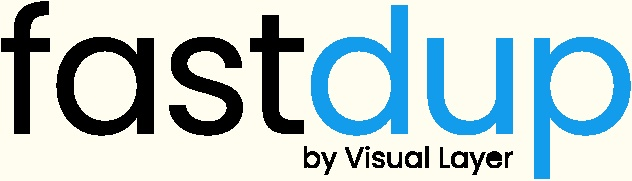
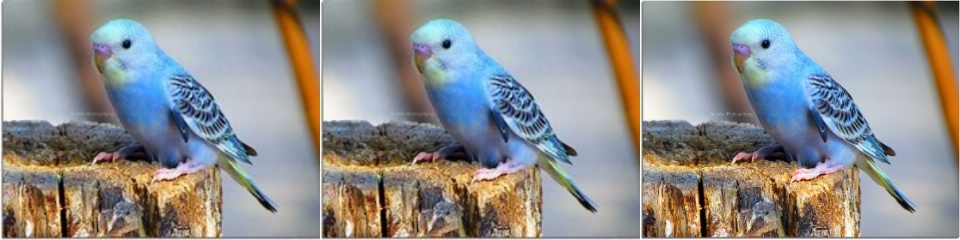
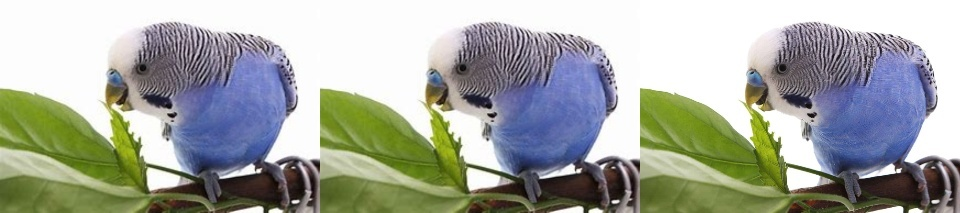

0

In [ ]:
fd.vis.component_gallery(num_images=2, how = 'all')

### Given the distance then find duplicates

Generating gallery:   0%|          | 0/2 [00:00<?, ?it/s]

Stored similarity visual view in  Dataset3/Report/galleries/duplicates.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



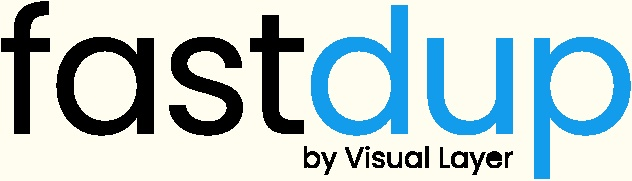
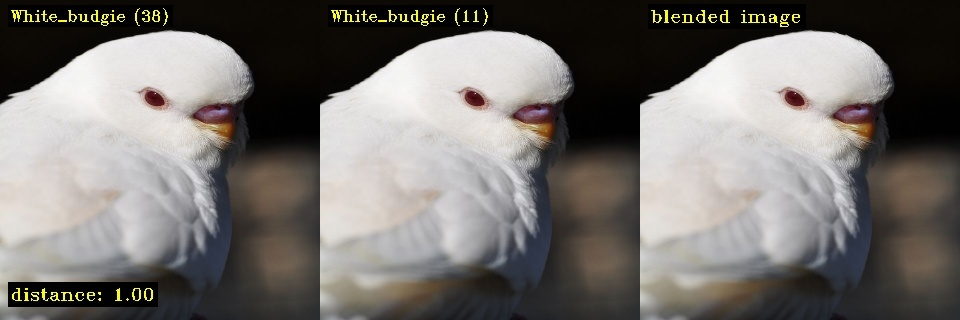

0

In [ ]:
fd.vis.duplicates_gallery(save_path = None,
                       draw_bbox= True,
                       num_images = 2,
                       max_width= None,
                       lazy_load= False,
                       slice = None,
                       ascending = False,
                       threshold = None,
                       save_artifacts= False,
                       show = True,
                        how = 'all')

In [ ]:
similarity = pd.read_csv('/content/Dataset3/Report/similarity.csv')
similarity
# data for final inform
list_of_duplicates_images = similarity[similarity['distance'] > 0.9]
list_of_duplicates_images

,from,to,distance
0,128,104,1.000000
1,104,128,1.000000
2,231,232,1.000000
3,232,231,1.000000
4,7,5,1.000000
...,...,...,...
79,24,49,0.911169
80,280,259,0.907958
81,259,280,0.907958
82,148,159,0.901763


In [ ]:
top_components = fastdup.find_top_components(work_dir="/content/Dataset3/Report")

# dry_run=True to check the list of image that potentially will be deleted
fastdup.delete_components(top_components, dry_run=True)

# Performe delection (one = argument to leave one of the duplicate images)
todelete = fastdup.delete_components(top_components, dry_run=True, how = 'one')
len(todelete)

rm -f Dataset3/Images/Blue_budgies/Blue_budgie (11).jpeg
rm -f Dataset3/Images/Blue_budgies/Blue_budgie (53).jpg
rm -f Dataset3/Images/Blue_budgies/Blue_budgie (15).jpeg
rm -f Dataset3/Images/Blue_budgies/Blue_budgie (20).jpg
rm -f Dataset3/Images/Blue_budgies/Blue_budgie (17).jpg
rm -f Dataset3/Images/Blue_budgies/Blue_budgie (33).jpg
rm -f Dataset3/Images/Blue_budgies/Blue_budgie (32).jpg
rm -f Dataset3/Images/Blue_budgies/Blue_budgie (56).jpg
rm -f Dataset3/Images/Others/others (27).jpg
rm -f Dataset3/Images/Others/others (12).jpg
rm -f Dataset3/Images/Wild_budgies/Wild_budgie (106).jpg
rm -f Dataset3/Images/Others/others (22).jpg
rm -f Dataset3/Images/White_budgies/White_budgie (39).jpg
rm -f Dataset3/Images/White_budgies/White_budgie (38).jpg
rm -f Dataset3/Images/White_budgies/White_budgie (4).jpg
rm -f Dataset3/Images/White_budgies/White_budgie (5).jpg
rm -f Dataset3/Images/Wild_budgies/Wild_budgie (117).jpg
rm -f Dataset3/Images/Wild_budgies/Wild_budgie (85).jpg
rm -f Dataset3/

40

In [ ]:
# Delect duplicate files
fastdup.delete_components(top_components, dry_run=False, how = 'one')

total deleted 2 files
total deleted 2 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files


['Dataset3/Images/Blue_budgies/Blue_budgie (11).jpeg',
 'Dataset3/Images/Blue_budgies/Blue_budgie (53).jpg',
 'Dataset3/Images/Blue_budgies/Blue_budgie (15).jpeg',
 'Dataset3/Images/Blue_budgies/Blue_budgie (20).jpg',
 'Dataset3/Images/Blue_budgies/Blue_budgie (17).jpg',
 'Dataset3/Images/Blue_budgies/Blue_budgie (33).jpg',
 'Dataset3/Images/Blue_budgies/Blue_budgie (32).jpg',
 'Dataset3/Images/Blue_budgies/Blue_budgie (56).jpg',
 'Dataset3/Images/Others/others (27).jpg',
 'Dataset3/Images/Others/others (12).jpg',
 'Dataset3/Images/Wild_budgies/Wild_budgie (106).jpg',
 'Dataset3/Images/Others/others (22).jpg',
 'Dataset3/Images/White_budgies/White_budgie (39).jpg',
 'Dataset3/Images/White_budgies/White_budgie (38).jpg',
 'Dataset3/Images/White_budgies/White_budgie (4).jpg',
 'Dataset3/Images/White_budgies/White_budgie (5).jpg',
 'Dataset3/Images/Wild_budgies/Wild_budgie (117).jpg',
 'Dataset3/Images/Wild_budgies/Wild_budgie (85).jpg',
 'Dataset3/Images/Wild_budgies/Wild_budgie (79).jpg

## **Dataset Cleaning Summary and Final Analysis**
The first code snipet prints out information of filtered images based on problimatic images, dublicates, outliers, dark images, bright images, and blurry images. After filtering out the iamges we are left with 244 images from our originial 339.


FastDup processed a total of 244 images located in the "Dataset/Images" directory. It performed an analysis to detect identical, nearly identical, and outlier images based on similarity thresholds.

The key findings from the analysis are:



1.   No fully identical images (similarity > 0.990) were found.

2.   No nearly identical images (similarity > 0.980) were found.

3.   No images above the specified threshold (similarity > 0.900) were found.

4.   24 outlier images (similarity < 0.050) were identified, which constitute 4.92% of the total graph edges.



The minimum similarity found among the images was 0.605, and the maximum similarity was 0.900.

In [ ]:
print(f"Initial_pictures: {initial_pictures}\n")
print(f"Broken: {len(list_of_broken_images)}")
print(f"Duplicates: {len(todelete)}")
print(f"Outliers: {len(list_of_outliers_images)}")
print(f"Dark: {len(list_of_dark_images)}")
print(f"Bright: {len(list_of_bright_images)}")
print(f"Blurry: {len(list_of_blurry_images)}\n")







problem_images = (len(list_of_broken_images) +
                  len(todelete)+
                  len(list_of_outliers_images)+
                  len(list_of_dark_images)+
                  len(list_of_bright_images)+
                  len(list_of_blurry_images))

print(f"problem_images: {problem_images}\n")

print(f"Final Dataset: {initial_pictures-problem_images}\n")

Initial_pictures: 309

Broken: 0
Duplicates: 40
Outliers: 2
Dark: 0
Bright: 0
Blurry: 3

problem_images: 45

Final Dataset: 264



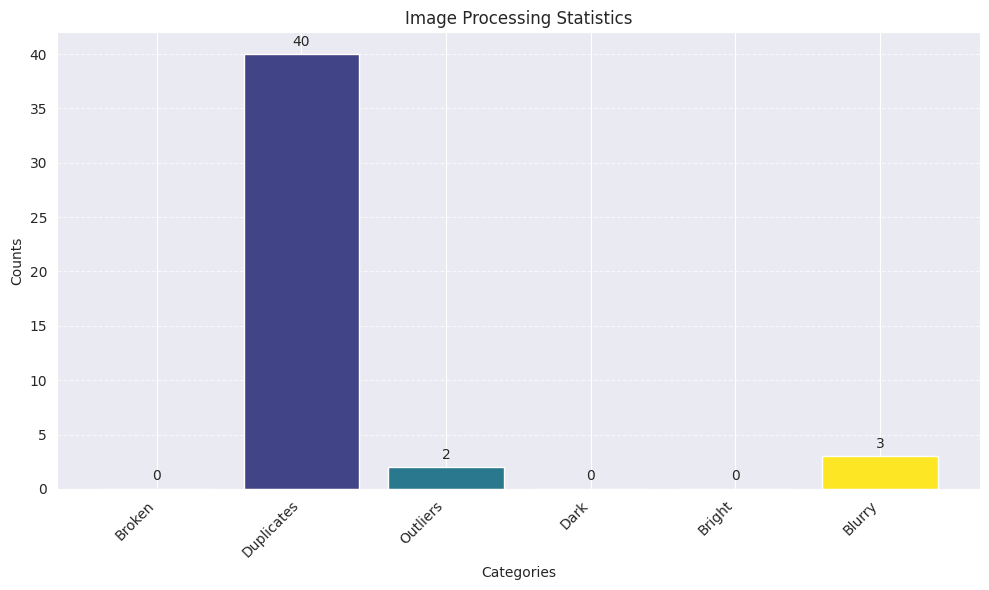

In [ ]:


import matplotlib.pyplot as plt

# Define the categories and their corresponding counts
categories = ['Broken', 'Duplicates', 'Outliers', 'Dark', 'Bright', 'Blurry']
counts = [len(list_of_broken_images), len(todelete), len(list_of_outliers_images), len(list_of_dark_images), len(list_of_bright_images), len(list_of_blurry_images)]

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=plt.cm.viridis(np.linspace(0, 1, len(categories))))

# Add counts above the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, count,
             ha='center', va='bottom')

# Customize plot
plt.title('Image Processing Statistics')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




In [ ]:
## Rerun Analysis to get final csv file

fd.run(input_dir= "/content/Dataset3/Images",
       verbose= True,
       cc_threshold=0.9,
       lower_threshold = 0.05,
       overwrite=True)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
fastdup C++ info received:  2024-05-06 01:38:23 [INFO] Going to loop over dir Dataset3/Images
2024-05-06 01:38:23 [INFO] Found total 264 images to run on, 264 train, 0 test, name list 264, counter 264 
2024-05-06 01:38:31 [INFO] Found total 264 images to run on
2024-05-06 01:38:31 [INFO] 18) Finished write_index() NN model
2024-05-06 01:38:31 [INFO] Stored nn model index file Dataset3/Report/nnf.index
2024-05-06 01:38:31 [INFO] Total time took 8033 ms
2024-05-06 01:38:31 [INFO] Found a total of 0 fully identical images (d>0.990), which are 0.00 % of total graph edges
2024-05-06 01:38:31 [INFO] Found a total of 0 nearly identical images(d>0.980), which are 0.00 % of total graph edges
2024-05-06 01:38:31 [INFO] Found a total of 0 above threshold images (d>0.900), which are 0.00 % of total graph edges
2024-05-06 01:38:31 [INFO] Found a total of 26 outlier images         (d<0.050), which are 4.92 % of total graph ed

/usr/local/lib/python3.10/dist-packages/fastdup/fastdup_controller.py:434: UserWarning: No connected components found, try using a lower threshold
  warnings.warn(f'No connected components found, try using a lower threshold')


0

##Final database





In [ ]:

budgerigars = fd.img_stats()

budgerigars.head()

#export outlier becuase the original file does not have filenames
budgerigars.to_csv('/content/Dataset3/Meta/CleanBudgerigars.csv')

# ######################################### End Curatoring #########################################

# **Objective 2: Normalization and Resizing**

### 1) Loading Data into H5 File

Load the cleaned image data into H5 file


In [ ]:
# Function to resize and normalize images
# only changed code using PIL to cv2
def preprocess_image(image_path, target_size=(224, 224)):
    try:
        img = cv2.imread(image_path)
        img = cv2.resize(img, dsize=target_size, interpolation=cv2.INTER_AREA)  # Resize image while preserving aspect ratio
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format if image has an alpha channel
        img_data = np.array(img)
        # Create a blank image of the target size
        resized_img = np.zeros((target_size[1], target_size[0], 3), dtype=np.uint8)
        # Calculate padding to center the resized image
        pad_height = (target_size[1] - img_data.shape[0]) // 2
        pad_width = (target_size[0] - img_data.shape[1]) // 2
        # Insert the resized image into the center of the blank image
        resized_img[pad_height:pad_height+img_data.shape[0], pad_width:pad_width+img_data.shape[1], :] = img_data
        # Normalize pixel values to range [0, 1]
        resized_img = resized_img / 255.0
        return resized_img
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

In [ ]:
# Function to process images in a directory and store them in an HDF5 file with class labels
def images_to_hdf5_with_labels(input_directory, output_h5):
    image_files = []
    labels = []
    for root, dirs, files in os.walk(input_directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.jpeg'):
                image_files.append(os.path.join(root, file))
                labels.append(os.path.basename(root))  # Class label is the subfolder name

    num_images = len(image_files)

    if num_images == 0:
        print("No JPEG images found in the input directory.")
        return

    with h5py.File(output_h5, 'w') as hf:
        for i, (image_file, label) in enumerate(zip(image_files, labels)):
            img_data = preprocess_image(image_file)
            if img_data is not None:
                hf.create_dataset(f'image_{i}', data=img_data)
                hf.create_dataset(f'label_{i}', data=label)
                print(f"Processed and saved image {i+1}/{num_images} with label {label}")

In [ ]:
input_directory = '/content/Dataset3'
output_h5 = 'images_with_labels.h5'
images_to_hdf5_with_labels(input_directory, output_h5)

Processed and saved image 1/259 with label White_budgies
Processed and saved image 2/259 with label White_budgies
Processed and saved image 3/259 with label White_budgies
Processed and saved image 4/259 with label White_budgies
Processed and saved image 5/259 with label White_budgies
Processed and saved image 6/259 with label White_budgies
Processed and saved image 7/259 with label White_budgies
Processed and saved image 8/259 with label White_budgies
Processed and saved image 9/259 with label White_budgies
Processed and saved image 10/259 with label White_budgies
Processed and saved image 11/259 with label White_budgies
Processed and saved image 12/259 with label White_budgies
Processed and saved image 13/259 with label White_budgies
Processed and saved image 14/259 with label White_budgies
Processed and saved image 15/259 with label White_budgies
Processed and saved image 16/259 with label White_budgies
Processed and saved image 17/259 with label White_budgies
Processed and saved ima

### 2) Function to print hdf5 labels

In [ ]:
import h5py

def print_hdf5_labels(h5_file):
    try:
        with h5py.File(h5_file, 'r') as hf:
            for key in hf.keys():
                if key.startswith('label_'):
                    label_data = hf[key][()].decode()         #.decode removes 'b' prefix
                    print(f"Dataset: {key}, Label: {label_data}")
    except Exception as e:
        print(f"Error reading HDF5 file: {e}")

# Example usage
h5_file = 'images_with_labels.h5'
print_hdf5_labels(h5_file)

Dataset: label_0, Label: White_budgies
Dataset: label_1, Label: White_budgies
Dataset: label_10, Label: White_budgies
Dataset: label_100, Label: Wild_budgies
Dataset: label_101, Label: Wild_budgies
Dataset: label_102, Label: Wild_budgies
Dataset: label_103, Label: Wild_budgies
Dataset: label_104, Label: Wild_budgies
Dataset: label_105, Label: Wild_budgies
Dataset: label_106, Label: Wild_budgies
Dataset: label_107, Label: Wild_budgies
Dataset: label_108, Label: Wild_budgies
Dataset: label_109, Label: Wild_budgies
Dataset: label_11, Label: White_budgies
Dataset: label_110, Label: Wild_budgies
Dataset: label_111, Label: Wild_budgies
Dataset: label_112, Label: Wild_budgies
Dataset: label_113, Label: Wild_budgies
Dataset: label_114, Label: Wild_budgies
Dataset: label_115, Label: Wild_budgies
Dataset: label_116, Label: Wild_budgies
Dataset: label_117, Label: Wild_budgies
Dataset: label_118, Label: Wild_budgies
Dataset: label_119, Label: Wild_budgies
Dataset: label_12, Label: White_budgies
Da

### 3)Print names and shapes of datasets in the HDF5 File



In [ ]:
# Open the HDF5 file
with h5py.File("images_with_labels.h5", "r") as hf:
    # Check if the file contains any datasets
    if hf.keys():
        print("The HDF5 file contains the following datasets:")
        # Print the names and shapes of the datasets
        for dataset_name in hf.keys():
            dataset = hf[dataset_name]
            print(f"{dataset_name}: {dataset.shape}")
    else:
        print("The HDF5 file is empty or does not contain any datasets.")


The HDF5 file contains the following datasets:
image_0: (224, 224, 3)
image_1: (224, 224, 3)
image_10: (224, 224, 3)
image_100: (224, 224, 3)
image_101: (224, 224, 3)
image_102: (224, 224, 3)
image_103: (224, 224, 3)
image_104: (224, 224, 3)
image_105: (224, 224, 3)
image_106: (224, 224, 3)
image_107: (224, 224, 3)
image_108: (224, 224, 3)
image_109: (224, 224, 3)
image_11: (224, 224, 3)
image_110: (224, 224, 3)
image_111: (224, 224, 3)
image_112: (224, 224, 3)
image_113: (224, 224, 3)
image_114: (224, 224, 3)
image_115: (224, 224, 3)
image_116: (224, 224, 3)
image_117: (224, 224, 3)
image_118: (224, 224, 3)
image_119: (224, 224, 3)
image_12: (224, 224, 3)
image_120: (224, 224, 3)
image_121: (224, 224, 3)
image_122: (224, 224, 3)
image_123: (224, 224, 3)
image_124: (224, 224, 3)
image_125: (224, 224, 3)
image_126: (224, 224, 3)
image_127: (224, 224, 3)
image_128: (224, 224, 3)
image_129: (224, 224, 3)
image_13: (224, 224, 3)
image_130: (224, 224, 3)
image_131: (224, 224, 3)
image_132: 

### 4) Process Visualization

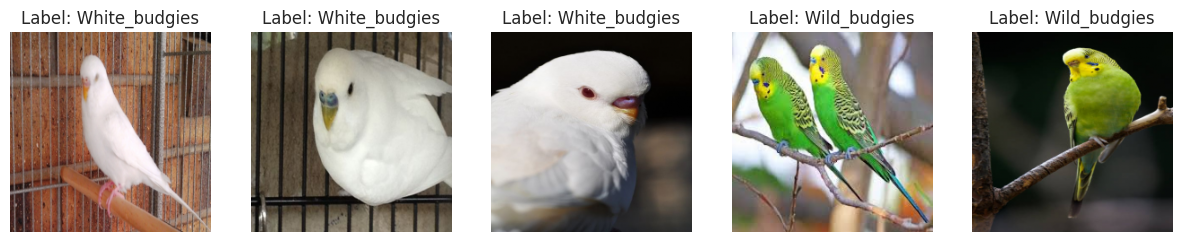

In [ ]:
# Function to read image data from an HDF5 file
def read_hdf5_images(file_path):
    images = []
    labels = []
    with h5py.File(file_path, 'r') as hf:
        for key in hf.keys():
            # Check if the dataset key contains 'image'
            if 'image' in key:
                images.append(np.array(hf[key]))
            # Check if the dataset key contains 'label'
            elif 'label' in key:
                labels.append(np.array(hf[key][()].decode()))   #[()].decode() removes 'b' prefix
    return images, labels

n = 5 #number of images to visualize
# Function to visualize images
def visualize_images(images, labels):
    num_images = len(images)
    if num_images == 0:
        print("No images found in the HDF5 file.")
        return
    plt.figure(figsize=(15, 5))
    for i, image in enumerate(images[:n]):  # Visualize only the first 5 images
        plt.subplot(1, n, i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title("Label: {}".format(labels[i]))
    plt.show()

h5_file_path = 'images_with_labels.h5'
images, labels = read_hdf5_images(h5_file_path)
visualize_images(images, labels)


# **Objective 3: Data Augmentation**

Create a batch of augmented images and append it to images and labels


In [ ]:
# working with images and labels

# Convert the list of images to a NumPy array
images = np.array(images)

# Generate a batch of augmented images
datagen = ImageDataGenerator(
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    #zoom_range=0.01,             # maybe get rid of zoom
    horizontal_flip=True,
    fill_mode='nearest'
  )

datagen.fit(images.reshape(-1, 224, 224, 3))
augmented_data_generator = datagen.flow(images, labels)

numbatches = 30  # Number of batches to generate
for i in range(numbatches):
    # Get a batch of augmented data
    augmented_x_batch, augmented_y_batch = augmented_data_generator.next()

    # Append the batch of augmented data to the training set
    images = np.concatenate([images, augmented_x_batch], axis=0)
    labels = np.concatenate([labels, augmented_y_batch], axis=0)

num_images = images.shape[0]
print(num_images)

1132


#**Balance Classes**

balance the classes by finding the class with the least amount of images making sure each class has that many images.

labels is converted from strings to numerical data with [0, 1, 2, 3, 4] representing ['Blue_budgies', 'Others', 'White_budgies', 'Wild_budgies', 'Yellow_budgies']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder object on the unique labels in y_train
le.fit(np.unique(labels))

# Transform the string labels in y_train to numerical labels
labels_numerical = le.transform(labels)
print(f'labels_numerical: {labels_numerical}')

labels_numerical: [2 2 2 ... 2 3 3]


In [ ]:
def balance_classes(x_train, y_train):
    # Count the number of samples in each class
    class_counts = {}
    for label in np.unique(y_train):
        class_counts[label] = np.sum(y_train == label)

    # Find the smallest class size
    min_class_size = min(class_counts.values())

    # Initialize lists to store balanced data
    balanced_x_train = []
    balanced_y_train = []

    print(f'Class counts: {class_counts}')
    print(f'Min class size: {min_class_size}')

    # Randomly select subset from each class
    for label in class_counts:
        indices = np.where(y_train == label)[0]
        selected_indices = np.random.choice(indices, size=min_class_size, replace=False)
        balanced_x_train.extend(x_train[selected_indices])
        balanced_y_train.extend(y_train[selected_indices])

    # Convert lists to numpy arrays
    balanced_x_train = np.array(balanced_x_train)
    balanced_y_train = np.array(balanced_y_train)

    # Convert the numerical labels back to strings
    #balanced_y_train = le.inverse_transform(balanced_y_train)

    return balanced_x_train, balanced_y_train

# Assuming x_train and y_train are your input features and labels
images_balanced, labels_balanced = balance_classes(images, labels_numerical)

print(f'labels_balanced: {labels_balanced}')

Class counts: {0: 257, 1: 139, 2: 145, 3: 418, 4: 173}
Min class size: 139
labels_balanced: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3

# **Objective 4: Data Splitting**

Dividing the dataset into training, validation, and testing sets to evaluate model performance effectively.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images_balanced, labels_balanced, test_size=0.3, random_state=42)

# Split the testing set into validation and test sets
#x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print(type(x_train))
print(f"Length of x_train: {len(x_train)}")
print(f"Length of y_train: {len(y_train)}")

print(f"Length of x_test: {len(x_test)}")
print(f"Length of y_test: {len(y_test)}")

#print(f"Length of x_val: {len(x_val)}")
#print(f"Length of y_val: {len(y_val)}")

<class 'numpy.ndarray'>
Length of x_train: 486
Length of y_train: 486
Length of x_test: 209
Length of y_test: 209


# **Objective 5: Visualization**

Now inspecting the dataset to identify augmented data and patterns.

Augmented Images:


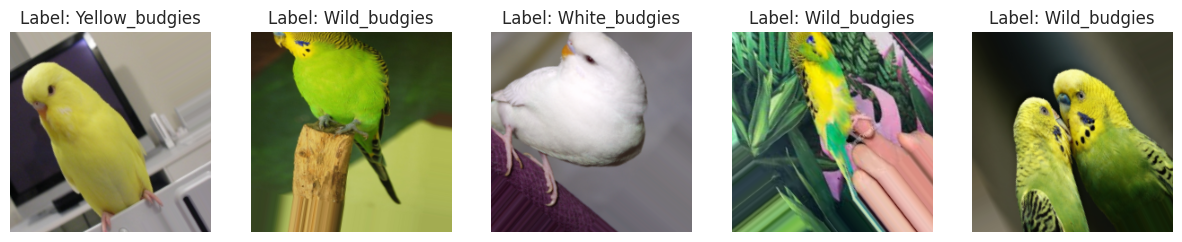

In [ ]:
#visualize augmented data, and make sure labels match
print("Augmented Images:")
#visualize_images(augmented_x_batch[:10], augmented_y_batch[:10])
visualize_images(augmented_x_batch, augmented_y_batch)

Class Distribution:
Class White_budgies: 97 images
Class Wild_budgies: 104 images
Class Others: 97 images
Class Blue_budgies: 87 images
Class Yellow_budgies: 101 images


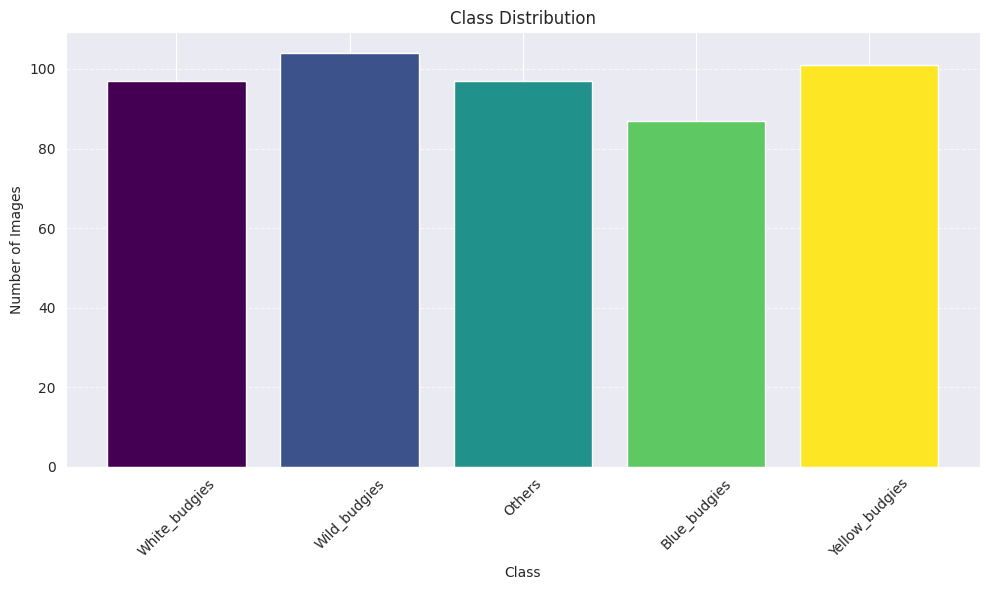

In [ ]:
#this gives us the amount of each class in our train data

# convert y_train back to strings for easy reading on graph
y_train_strings = le.inverse_transform(y_train)

class_counts = {}
for label in y_train_strings:
    if label in class_counts:
        class_counts[label] += 1
    else:
        class_counts[label] = 1

print("Class Distribution:")
for label, count in class_counts.items():
    print("Class {}: {} images".format(label, count))


#################


# Calculate class counts
class_counts = {}
for label in y_train_strings:
    if label in class_counts:
        class_counts[label] += 1
    else:
        class_counts[label] = 1

# Get class labels and their corresponding counts
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Plotting the class distribution with "viridis" colormap
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color=plt.cm.viridis(np.linspace(0, 1, len(classes))))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Objective 6: Dataloader**

Load pre-processed dataset into a “torch.utils.data.DataLoader” that is ready to use like HW.

In [ ]:
batch_size = 32

# Trainloader

# Convert x_train and y_train to tensors
y_train_tensor = torch.Tensor(y_train)
x_train_tensor = torch.Tensor(x_train)
x_train_tensor = torch.transpose(x_train_tensor, 1, 3)

# Create a TensorDataset from the two tensors
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)

# Create a DataLoader
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# Testloader, same method as above but with x_test and y_test

y_test_tensor = torch.Tensor(y_test)
x_test_tensor = torch.Tensor(x_test)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# Valloader, same method but with x_val and y_val

#y_val_tensor = torch.Tensor(y_test)
#x_val_tensor = torch.Tensor(x_test)
#val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

#valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

#**Upload files to personal google drive**

In [ ]:
import zipfile
from io import BytesIO

with h5py.File('x_train.h5', 'w') as hf:
    hf.create_dataset('x_train', data=x_train)

# Create a BytesIO object to hold the zipped file
zip_buffer = BytesIO()

# Create a zip file
with zipfile.ZipFile(zip_buffer, 'w') as zip_file:
    # Add the HDF5 file to the zip file
    zip_file.write('x_train.h5')

# Reset the buffer position to the beginning
zip_buffer.seek(0)

with open('x_train.zip', 'wb') as f:
    f.write(zip_buffer.read())

In [ ]:
with h5py.File('x_test.h5', 'w') as hf:
    hf.create_dataset('x_test', data=x_test)

# Create a BytesIO object to hold the zipped file
zip_buffer = BytesIO()

# Create a zip file
with zipfile.ZipFile(zip_buffer, 'w') as zip_file:
    # Add the HDF5 file to the zip file
    zip_file.write('x_test.h5')

# Reset the buffer position to the beginning
zip_buffer.seek(0)

with open('x_test.zip', 'wb') as f:
    f.write(zip_buffer.read())

In [ ]:
#with h5py.File('x_val.h5', 'w') as hf:
#    hf.create_dataset('x_val', data=x_val)

# Create a BytesIO object to hold the zipped file
#zip_buffer = BytesIO()

# Create a zip file
#with zipfile.ZipFile(zip_buffer, 'w') as zip_file:
    # Add the HDF5 file to the zip file
#    zip_file.write('x_val.h5')

# Reset the buffer position to the beginning
#zip_buffer.seek(0)

#with open('x_val.zip', 'wb') as f:
#    f.write(zip_buffer.read())

In [ ]:
import shutil
from google.colab import drive

drive.mount('/content/drive')

source_file_path = 'x_train.zip'
destination_drive_path = '/content/drive/My Drive/'
shutil.copy(source_file_path, destination_drive_path)

source_file_path = 'x_test.zip'
destination_drive_path = '/content/drive/My Drive/'
shutil.copy(source_file_path, destination_drive_path)

#source_file_path = 'x_val.zip'
#destination_drive_path = '/content/drive/My Drive/'
#shutil.copy(source_file_path, destination_drive_path)

Mounted at /content/drive


'/content/drive/My Drive/x_test.zip'

In [ ]:
# Convert y_train to a NumPy array of Unicode strings
y_train_array = np.array(y_train, dtype='S14')

# Now create the dataset in the HDF5 file
with h5py.File('y_train.h5', 'w') as hf:
    hf.create_dataset('y_train', data=y_train_array)


In [ ]:
# Convert y_test to a NumPy array of Unicode strings
y_test_array = np.array(y_test, dtype='S14')

# Now create the dataset in the HDF5 file
with h5py.File('y_test.h5', 'w') as hf:
    hf.create_dataset('y_test', data=y_test_array)

In [ ]:
# Convert y_val to a NumPy array of Unicode strings
#y_val_array = np.array(y_val, dtype='S14')

# Now create the dataset in the HDF5 file
#with h5py.File('y_val.h5', 'w') as hf:
#    hf.create_dataset('y_val', data=y_test_array)


In [ ]:
# upload y_test.h5 and y_train.h5 to your google drive

source_file_path = 'y_test.h5'
destination_drive_path = '/content/drive/My Drive/'
shutil.copy(source_file_path, destination_drive_path)

source_file_path = 'y_train.h5'
destination_drive_path = '/content/drive/My Drive/'
shutil.copy(source_file_path, destination_drive_path)

#source_file_path = 'y_val.h5'
#destination_drive_path = '/content/drive/My Drive/'
#shutil.copy(source_file_path, destination_drive_path)

'/content/drive/My Drive/y_train.h5'